<a href="https://colab.research.google.com/github/Imtiaj-Sajin/Face-Recognition-using-CNN/blob/main/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Files

In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
Data_Path='/content/drive/MyDrive/Imagedata'
categories= os.listdir(Data_Path)
print(categories[59])

AL-NAFI


**Loop through each label folder to access the images:**

In [4]:
!pip install pyheif
!pip install pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 69.1 MB/s eta 0:00:00


In [5]:
!pip install opencv-python-headless


In [13]:
from PIL import Image
import pyheif
import gc


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect face, crop to square, resize, and return image
def process_image(image, target_size=(224, 224)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return None  # No face detected
    for (x, y, w, h) in faces:
        # Crop the face, making the crop square
        face = image[max(y - h // 4, 0):y + h + h // 4, max(x - w // 4, 0):x + w + w // 4]
        face = cv2.resize(face, target_size)
        return face
    return None

Train_Data = []

for l, c in enumerate(categories):
    print(l)
    category_path = os.path.join(Data_Path, c)
    if len(os.listdir(category_path)) >= 10:
        for file_name in tqdm(os.listdir(category_path)):
            file_path = os.path.join(category_path, file_name)
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.heic')):
                if file_name.lower().endswith('.heic'):
                    heif_file = pyheif.read(file_path)
                    image = Image.frombytes(
                        heif_file.mode,
                        heif_file.size,
                        heif_file.data,
                        "raw",
                        heif_file.mode,
                        heif_file.stride,
                    )
                    img = np.array(image)
                else:
                    img = cv2.imread(file_path)

                if img is not None:
                    processed_img = process_image(img)
                    if processed_img is not None:
                        Train_Data.append([processed_img, l])

                # Release memory
                gc.collect()  # Force garbage collection

cv2.destroyAllWindows()


0


100%|██████████| 22/22 [00:49<00:00,  2.24s/it]


1


100%|██████████| 11/11 [00:10<00:00,  1.03it/s]


2


100%|██████████| 20/20 [01:05<00:00,  3.27s/it]


3
4
5


100%|██████████| 19/19 [01:24<00:00,  4.44s/it]


6


100%|██████████| 21/21 [00:09<00:00,  2.30it/s]


7


100%|██████████| 13/13 [00:01<00:00,  7.41it/s]


8
9
10
11
12


100%|██████████| 36/36 [01:22<00:00,  2.30s/it]


13


100%|██████████| 20/20 [00:29<00:00,  1.49s/it]


14
15
16


100%|██████████| 11/11 [00:04<00:00,  2.30it/s]


17
18
19


100%|██████████| 10/10 [00:33<00:00,  3.30s/it]


20
21


100%|██████████| 11/11 [00:24<00:00,  2.19s/it]


22


100%|██████████| 19/19 [00:23<00:00,  1.26s/it]


23


100%|██████████| 20/20 [00:45<00:00,  2.26s/it]


24
25
26


100%|██████████| 10/10 [00:18<00:00,  1.82s/it]


27


100%|██████████| 20/20 [00:09<00:00,  2.11it/s]


28
29
30
31


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


32
33


100%|██████████| 11/11 [00:03<00:00,  3.28it/s]


34


100%|██████████| 32/32 [00:25<00:00,  1.27it/s]


35
36


100%|██████████| 10/10 [00:34<00:00,  3.44s/it]


37
38


100%|██████████| 21/21 [00:06<00:00,  3.09it/s]


39
40
41


100%|██████████| 32/32 [00:27<00:00,  1.18it/s]


42


100%|██████████| 11/11 [00:07<00:00,  1.53it/s]


43


100%|██████████| 12/12 [00:11<00:00,  1.03it/s]


44


100%|██████████| 15/15 [00:25<00:00,  1.67s/it]


45
46
47


100%|██████████| 26/26 [00:49<00:00,  1.90s/it]


48
49


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


50


100%|██████████| 28/28 [00:04<00:00,  6.18it/s]


51
52


100%|██████████| 29/29 [01:12<00:00,  2.49s/it]


53
54
55


100%|██████████| 11/11 [00:51<00:00,  4.65s/it]


56
57


100%|██████████| 10/10 [00:13<00:00,  1.32s/it]


58


100%|██████████| 20/20 [00:47<00:00,  2.36s/it]


59


100%|██████████| 11/11 [00:16<00:00,  1.49s/it]


60
61


100%|██████████| 26/26 [00:12<00:00,  2.04it/s]


62
63


100%|██████████| 10/10 [00:03<00:00,  2.74it/s]


64
65


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


66
67
68
69
70


100%|██████████| 10/10 [00:04<00:00,  2.13it/s]


71
72
73
74


100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


75


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


In [14]:
print(len(Train_Data))

529


In [15]:
print(categories[59])

AL-NAFI


In [16]:
random.shuffle(Train_Data)

array([[[ 69,  73,  68],
        [ 69,  73,  68],
        [ 72,  76,  71],
        ...,
        [184, 181, 190],
        [187, 184, 193],
        [190, 187, 196]],

       [[ 71,  75,  70],
        [ 71,  75,  70],
        [ 72,  76,  71],
        ...,
        [182, 179, 188],
        [186, 183, 192],
        [188, 185, 194]],

       [[ 68,  74,  69],
        [ 70,  76,  71],
        [ 71,  77,  72],
        ...,
        [182, 179, 188],
        [184, 181, 190],
        [187, 184, 193]],

       ...,

       [[ 58,  67, 104],
        [ 50,  60,  94],
        [ 54,  63,  97],
        ...,
        [ 55,  64, 101],
        [ 56,  67, 105],
        [ 57,  67, 107]],

       [[ 57,  66, 103],
        [ 52,  61,  95],
        [ 55,  64,  98],
        ...,
        [ 53,  62,  99],
        [ 59,  70, 108],
        [ 58,  69, 107]],

       [[ 44,  53,  89],
        [ 50,  59,  93],
        [ 51,  60,  94],
        ...,
        [ 55,  64, 101],
        [ 59,  68, 106],
        [ 57,  68, 106]]], dtype=uint8)
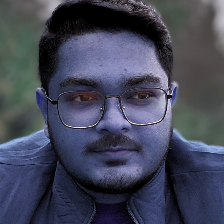

In [21]:
Train_Data[0][0]


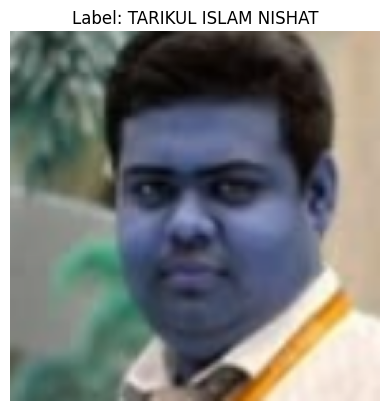

In [29]:

image, label = Train_Data[528]

plt.imshow(image)
plt.title(f'Label: {categories[label]}')
plt.axis('off')
plt.show()


# Need to store the Train_Data for next time

In [36]:
import pickle

file_path = "/content/drive/MyDrive/ML Data/Face Recognition/Train_Data.pkl"

with open(file_path, 'wb') as f:
    pickle.dump(Train_Data, f)

print("Train_Data saved successfully at:", file_path)


Train_Data saved successfully at: /content/drive/MyDrive/ML Data/Face Recognition/Train_Data.pkl


**Retrieve**

In [3]:
import pickle
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/ML Data/Face Recognition/Train_Data.pkl"

with open(file_path, 'rb') as f:
    Train_Data_loaded = pickle.load(f)


print("Number of entries in Train_Data:", len(Train_Data_loaded))



Mounted at /content/drive
Number of entries in Train_Data: 529


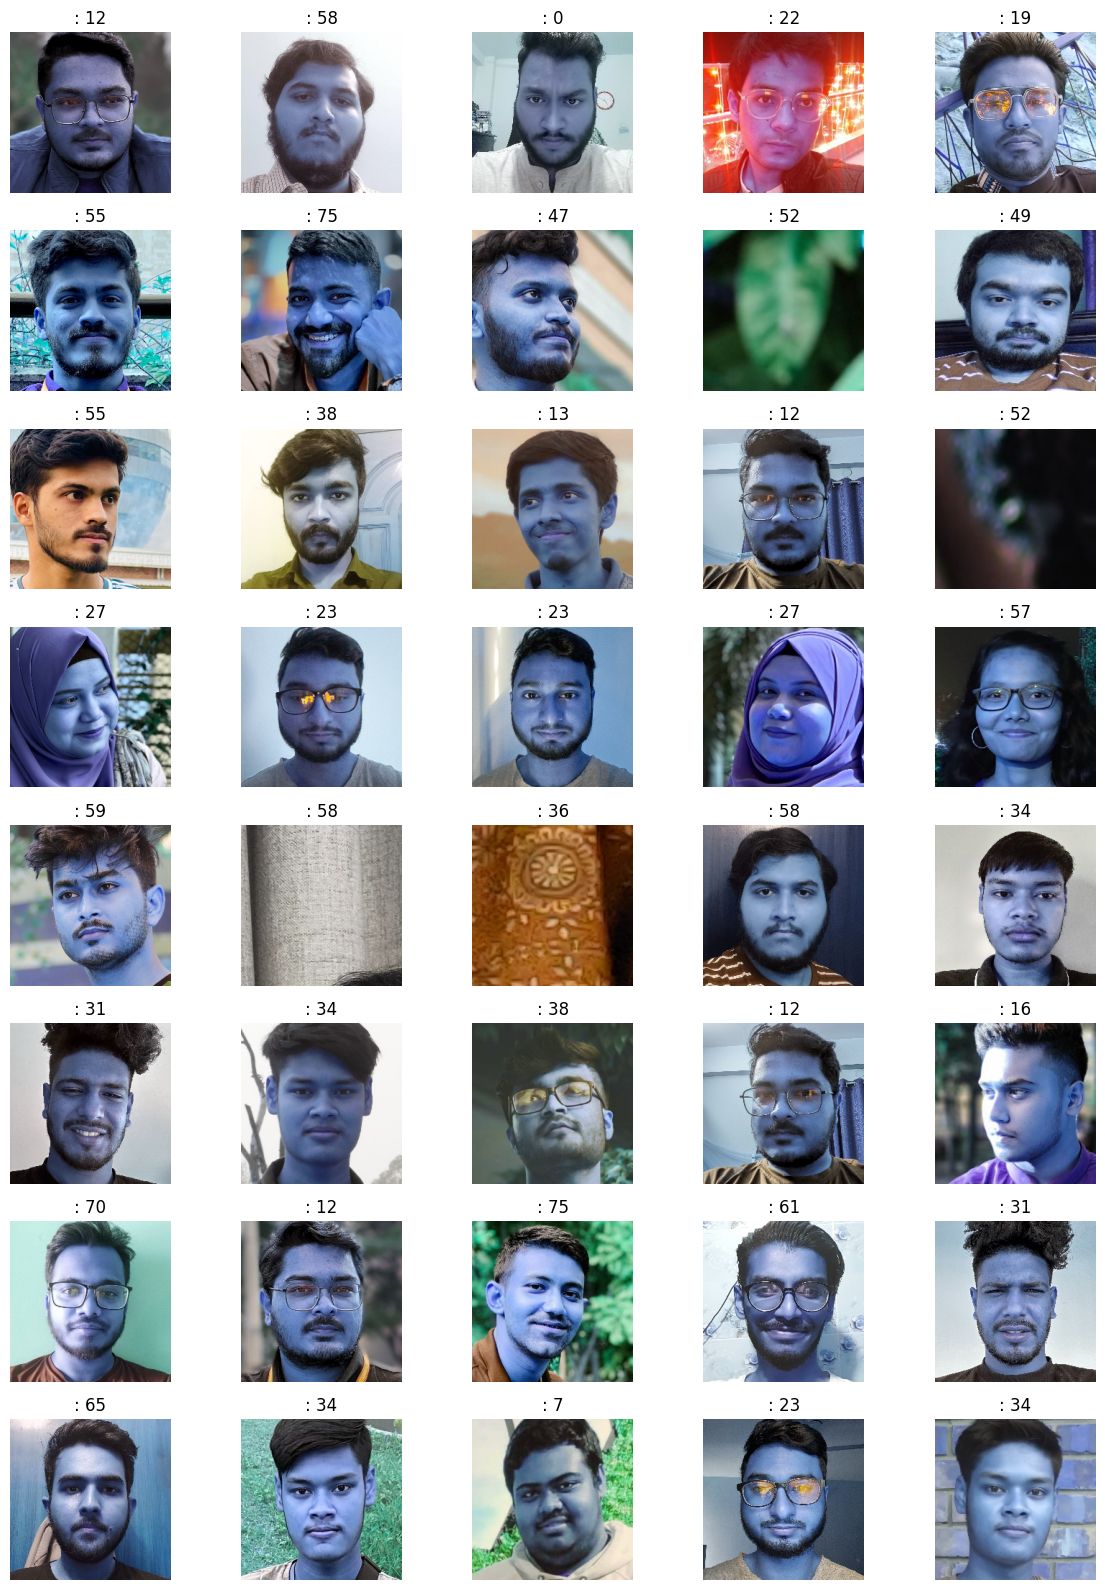

In [55]:
import matplotlib.pyplot as plt

num_rows = 8
num_cols = 5

plt.figure(figsize=(12, 16))

for i in range(min(40, len(Train_Data))):
    img, label = Train_Data[i]
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img)
    #plt.title(f": {categories[label]}")
    plt.title(f": {label}")
    plt.axis("off")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [1]:
#52 and 58 has some problem
images_with_label_52 = [image for image, label in Train_Data if label == 52]
print(f"Number of images with label 8: {len(images_with_label_8)}")

import matplotlib.pyplot as plt

num_images = len(images_with_label_52)
if num_images > 0:
    cols = min(num_images, 5)
    rows = (num_images + cols - 1) // cols

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 4))
    if rows > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for ax, image in zip(axes, images_with_label_8):
        ax.imshow(image)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No images with label 8 found.")


NameError: name 'Train_Data' is not defined